# ***Problem statement***

In this age of Global Village,Fake news spreading like cancer in the core of our society.As, a machine learning expert, I have taken the responsibility to identify the fake and genuine news accordingly using ML techniques.

In [1]:
#Mounting drive in colab
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
# for extracting zip file
import zipfile as z
zip_ref=z.ZipFile('/content/drive/MyDrive/train.csv (1).zip','r') #"r" for reading the file only given in the path '/content.../../../'
zip_ref.extractall("/content/") # extract zip_ref in the corrent directory.
zip_ref.close() # close zip_ref after extracting.

In [3]:
#reading the training data set.
import pandas as pd
fk_ns=pd.read_csv('/content/train.csv')


In [4]:
fk_ns.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


I have been provided with a data set of fake and genuine news from Kaggle.com.

* train.csv: A full training dataset with the following attributes:

* id: unique id for a news article
*title: the title of a news article
*author: author of the news article
*text: the text of the article; could be incomplete
*label: a label that marks the article as potentially unreliable
  * 1: unreliable
  * 0: reliable


In [5]:
fk_ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


So many NaN values present.
* 'title':558
* 'author':1957
* 'text':39

 columns in the data set.

 So,the most number of NaN values present in the 'author' column.

In [6]:
fk_ns=fk_ns.fillna(' ')# filling each NaN values with a space 

In [7]:
fk_ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


No,NaN value present now.

In [8]:
fk_ns.reset_index()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...,...
20795,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


# ***Data Preprocessing***

As, $'id'$ is not an important feature,dropping it does not affect the accurecy of the model.

In [9]:
# dropping 'id'
fk_ns=fk_ns.drop('id',axis=1)

In [10]:
author=fk_ns['author']

In [11]:
#To make (1)removing space in each author name,(2)making all the alphabates in lower case
fk_ns['author_s'] = fk_ns['author'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))

#To provide more weightage to the author ,make a list of same author name.
fk_ns['author_s']=fk_ns['author_s'].apply(lambda x:[x,x,x,x])
fk_ns['author_s']

0        [darrelllucus, darrelllucus, darrelllucus, dar...
1        [danielj.flynn, danielj.flynn, danielj.flynn, ...
2        [consortiumnews.com, consortiumnews.com, conso...
3        [jessicapurkiss, jessicapurkiss, jessicapurkis...
4        [howardportnoy, howardportnoy, howardportnoy, ...
                               ...                        
20795    [jeromehudson, jeromehudson, jeromehudson, jer...
20796    [benjaminhoffman, benjaminhoffman, benjaminhof...
20797    [michaelj.delamercedandrachelabrams, michaelj....
20798     [alexansary, alexansary, alexansary, alexansary]
20799    [davidswanson, davidswanson, davidswanson, dav...
Name: author_s, Length: 20800, dtype: object

So,there are four elemetns in each group in the list in *'author_s'*.

In [12]:
fk_ns.columns

Index(['title', 'author', 'text', 'label', 'author_s'], dtype='object')

Extra column appears:$'author\_s'$

**Making a new column $'text\_tile'~ using~ 'text'~ and ~'title'$**

In [13]:
fk_ns['text_tile']=fk_ns['text']+fk_ns['title']

In [14]:
fk_ns['text_tile'].iloc[1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [15]:
#making each string in 'text_tile' in lower case.
fk_ns['text_tile'] = fk_ns['text_tile'].astype('str').apply(lambda x: str.lower(x))

In [16]:
fk_ns['text_tile'].iloc[1]

'ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [hillary clinton remains the big woman on campus in leafy, liberal wellesley, massachusetts. everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way miss havisham forever wore that wedding dress.  speaking of great expectations, hillary rodham overflowed with them 48 years ago when she first addressed a wellesley graduating class. the president of the college informed those gathered in 1969 that the students needed “no debate so far as i could ascertain as to who their spokesman was to be” (kind of the like the democratic primaries in 2016 minus the   terms unknown then even at a seven sisters school). “i am very glad that miss adams made it clear that what i am speaking for today is all of us —  the 400 of us,” miss rodham told her classmates. after appointing herself edger bergen to the charlie mccarthys and mor

***Stemming***

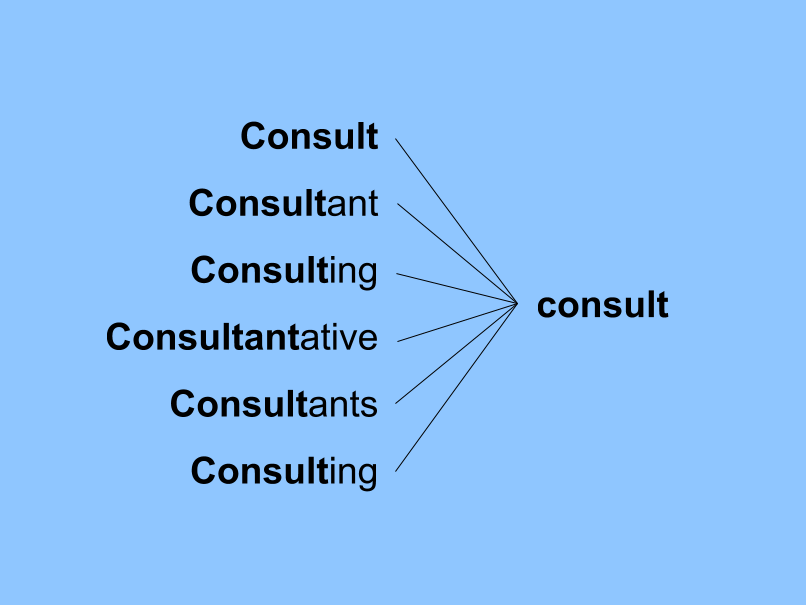

In [17]:
#importing Snowball Stemmer from nltk.stem
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english') # stemmer is using 'english' as language.


In [18]:
fk_ns['text_tile']=fk_ns['text_tile'].apply(lambda x: stemmer.stem(x)) # applying stemmer in 'text_tile'

In [19]:
fk_ns['text_tile'].iloc[1]

"ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [hillary clinton remains the big woman on campus in leafy, liberal wellesley, massachusetts. everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way miss havisham forever wore that wedding dress.  speaking of great expectations, hillary rodham overflowed with them 48 years ago when she first addressed a wellesley graduating class. the president of the college informed those gathered in 1969 that the students needed “no debate so far as i could ascertain as to who their spokesman was to be” (kind of the like the democratic primaries in 2016 minus the   terms unknown then even at a seven sisters school). “i am very glad that miss adams made it clear that what i am speaking for today is all of us —  the 400 of us,” miss rodham told her classmates. after appointing herself edger bergen to the charlie mccarthys and mor

In [20]:
#making another column 'soup' using 'text_tile' and 'author_s'
fk_ns=fk_ns.assign(soup=fk_ns.text_tile.astype('str') +fk_ns.author_s.astype('str'))


In [21]:
fk_ns.columns

Index(['title', 'author', 'text', 'label', 'author_s', 'text_tile', 'soup'], dtype='object')

*Count Vectorizer*

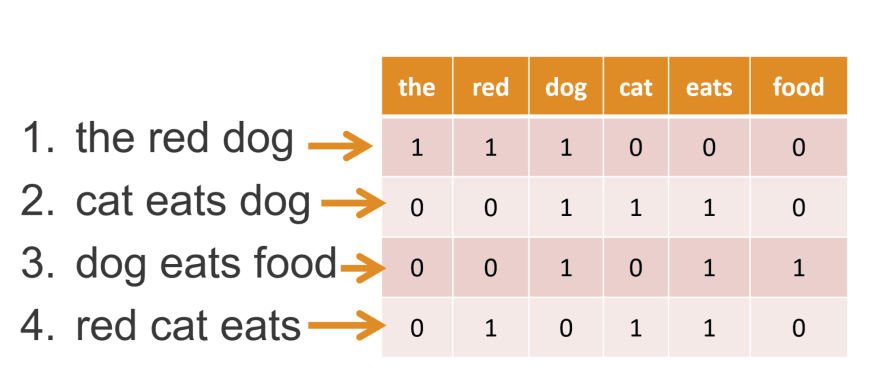

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer(max_features=5000,analyzer='word',min_df=0,stop_words='english')
#Maximum feature is customised to be 5000
#Making each unique word as a feature name.
count_matrix = count.fit_transform(fk_ns['soup']).toarray() # applying count vectorizer to 'soup' 

In [23]:
count_matrix.shape

(20800, 5000)

There are 5000 number of unique words!!!!So,the 'count_matrix' has 188235 columns

In [24]:
print(count.get_feature_names())
#to get the feature names in the 'count_matrix'.

['00', '000', '10', '100', '11', '12', '125', '13', '14', '15', '150', '16', '17', '18', '19', '1960s', '1970s', '1980', '1980s', '1990', '1990s', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2020', '20th', '21', '21st', '22', '23', '24', '25', '250', '26', '27', '28', '29', '30', '300', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '400', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '500', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '600', '65', '70', '700', '72', '75', '80', '800', '85', '8th', '90', '95', '99', '_____', 'aaron', 'abandon', 'abandoned', 'abc', 'abe', 'abedin', 'ability', 'able', 'abortion', 'abroad', 'absence', 'absolute', 'absolutely', 'absurd', 'abu', 'abuse', 'abuses', 'academic', 'academy', 'accept', 'acceptable', 'acceptance', '

In [25]:
count.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 0,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

**Making the count_matrix into the data frame**

In [26]:
count_mat=pd.DataFrame(count_matrix,columns=count.get_feature_names())

In [27]:
count_mat

,00,000,10,100,11,12,125,13,14,15,150,16,17,18,19,1960s,1970s,1980,1980s,1990,1990s,1991,1992,1993,1994,1995,1996,1997,1998,1999,20,200,2000,2001,2002,2003,2004,2005,2006,2007,...,written,wrong,wrote,www,xi,yahoo,yards,yeah,year,years,yellow,yemen,yes,yesterday,yiannopoulos,york,young,younger,youth,youtube,zero,zika,zionist,zone,zones,zu,для,за,из,как,мы,на,не,но,от,по,сша,то,что,это
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20796,0,0,0,0,1,0,0,0,1,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20797,0,1,1,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20798,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
x=count_mat

In [29]:
y=fk_ns['label']

In [30]:
x

,00,000,10,100,11,12,125,13,14,15,150,16,17,18,19,1960s,1970s,1980,1980s,1990,1990s,1991,1992,1993,1994,1995,1996,1997,1998,1999,20,200,2000,2001,2002,2003,2004,2005,2006,2007,...,written,wrong,wrote,www,xi,yahoo,yards,yeah,year,years,yellow,yemen,yes,yesterday,yiannopoulos,york,young,younger,youth,youtube,zero,zika,zionist,zone,zones,zu,для,за,из,как,мы,на,не,но,от,по,сша,то,что,это
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20796,0,0,0,0,1,0,0,0,1,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20797,0,1,1,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20798,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [34]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

# ***Passive Aggresive Classifier***

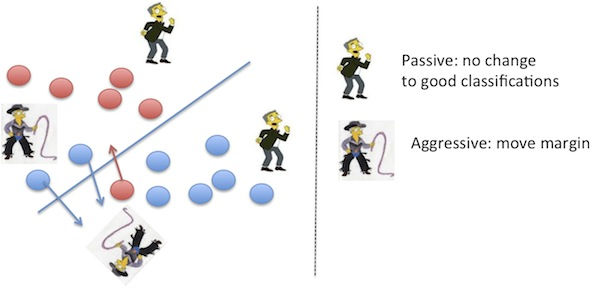

In [35]:
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

In [37]:
pred = linear_clf.fit(x_train,y_train)
pred1=linear_clf.predict(x_test)
pred2=linear_clf.predict(x_train)
score = metrics.accuracy_score(y_test, pred1)*100
score2 = metrics.accuracy_score(y_train, pred2)*100
print(" Test Accuracy:   %0.3f" % score,'%')
print(" Training Accuracy:   %0.3f" % score2,'%')


 Test Accuracy:   96.970 %
 Training Accuracy:   100.000 %


# $Conclusion:$
the difference between training accurecy and test accurecy is less($<4$),so the model is not over fitted.

* Future Motivation:

    1)Using Multinomial Naive Bayes and Random Forest can be implemented as a classification model.

    2)Insted of CountVectorizer,TfIdf can be used.


$As~my~sole~purspose~of ~the~project~is~to ~implement~Passive~Aggresive~Classifier,I ~have ~used ~only~this ~model.$



